# Introduction

For sample $\{x_i\}_{i=1, ... , n} \subset \mathbb{R}$ with positive third centeral moment

$$ \sum{(x_i - \overline{x})^3} > 0 $$

where $\overline{x}$ is the mean of sample $\frac{\sum{(x_i)}}{n} $.

We can construct a monotone increasing analytic function (order-preserve)

$$ f:\mathbb{R} \rightarrow \mathbb{R} $$

$$ f(x) = a*(\ln(x+k) - b) $$

such that $\{y_i\}$, with $y_i = f(x_i)$, has zero-mean, unit standard deviation and zero skewness

$$ \sum{y_i} = 0 $$

$$ \sum{y_i}^2 = 1 $$

$$ \sum{y_i}^3 = 0 $$

moreover, $a, b, k$ above are unique



For case negative third centeral moment, apply this process to $\{-x_i\}$, and reverse $\{y_i\}$ finally.


# Import

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define

In [5]:
def Normalizer(sample, std_threshold=10**-6):
    sample_mean = sample.mean()
    sample_std = sample.std()
    if sample_std <=std_threshold:
        sample_std = std_threshold
        print("WARNING : sample standard deviation smaller than threshold, set to threshold : ", std_threshold)
    
    return sample_mean, sample_std, (sample-sample_mean)/sample_std

def Skew(sample, decimals=6):
    return np.round((Normalizer(sample)[2]**3).mean(), decimals)

def Kurtosis(sample, decimals=6):
    return np.round((Normalizer(sample)[2]**4).mean(), decimals)

def SkewlessNormalizer(sample, iterate = 1000, skew_threshold=10**-3):
    reverse = 1
    if np.abs(Skew(sample)) < skew_threshold:
        return sample
    elif Skew(sample) < 0:
        reverse = -1
    
    sample_min = (reverse*sample).min() # to non-negative
    bias = 1.
    move = 1.
    sign = 1
    for i in range(iterate):
        pre_sign = sign
        trans_skew = Skew(np.log(reverse*sample - sample_min + bias))
        if np.abs(trans_skew)<skew_threshold:
            break
        elif trans_skew > 0:
            sign = -1
        else:
            sign = 1
        
        if sign*pre_sign < 1:
            move *= 0.5
        
        if bias + sign*move > 0:
            bias += sign*move
        else:
            bias = bias/2
    
    skewless_sample = reverse*np.log(reverse*sample - sample_min + bias)
    return Normalizer(skewless_sample)[2]

def RandomBinarySkew(mean, std, skewness, size):
    # return random bianry value from distribution with given mean, std, skewness
    abs_skewness = np.abs(skewness)
    value = (abs_skewness + np.sqrt(abs_skewness**2+4))/2
    prob = 1/((value**2)+1)
    random_seed = np.random.random(size)
    output = value*(random_seed < prob) - (1/value)*(random_seed >= prob)
    if skewness < 0:
        output *= -1
    
    output = std*output + mean
    return output

def RandomBernoulliSkew(mean, std, skewness, order, size):
    # return random value from (n+1)-value discreat distribution with given mean, std, skewness
    # this distribution construct by the sum of n indepent RandomBinarySkew above
    # where n = order
    order = max(1, order)
    order_sqrt = np.sqrt(order)
    output = RandomBinarySkew(0, 1, skewness*order_sqrt, size)
    for t in range(1, order):
        output += RandomBinarySkew(0, 1, skewness*order_sqrt, size)
    
    output /= order_sqrt
    output = std*output + mean
    return output

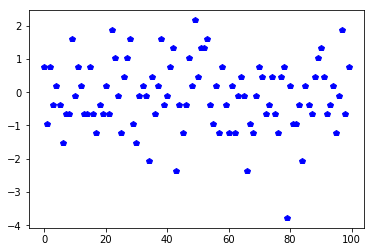

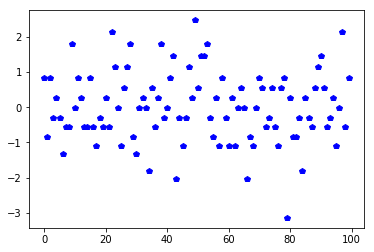

In [40]:
mean = 0.
std = 1.
skew = -0.2
order = 100
sample = 100

dis = RandomBernoulliSkew(mean, std, skew, order, sample)
skewless_dis = SkewlessNormalizer(dis)
plt.plot(np.arange(sample), dis, "bp")
plt.show()
plt.plot(np.arange(sample), skewless_dis, "bp")
plt.show()

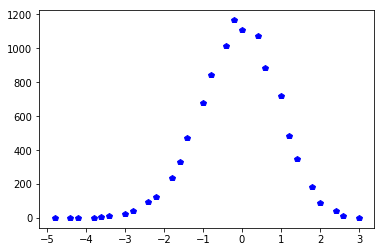

In [31]:


mean = 0.
std = 1.
skew = -0.2
order = 100
sample = 10000

dis = RandomBernoulliSkew(mean, std, skew, order, sample)

counter = np.zeros(100)
for i in range(100):
    counter[i] = ((dis>((i-50)/5))*(dis<((i-49)/5))).sum()

import matplotlib.pyplot as plt
index = (counter>0)
plt.plot(((np.arange(100)-50)/5)[index], counter[index], "bp")
plt.show()